In [5]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Linux_home/Qishi/QishiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('../config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Bu test

## Build time series of Major contracts without thresholding the price movements

In [6]:
bu_mj = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset)
df_bu_train, df_bu_test, ptb = bu_mj.create_major_overlap()

strategy = list(ptb.values())
slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


## price change distribution

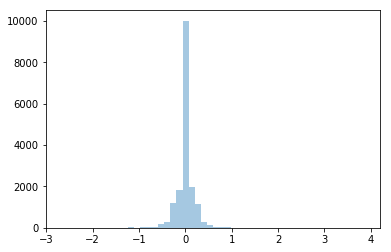

In [7]:
import seaborn as sns
bu_pct_change_train = df_bu_train.LastPrice.pct_change().dropna().values*100
sns.distplot(bu_pct_change_train, kde=False)

Calcualte the standard deviation of price change:

In [8]:
np.std(bu_pct_change_train)

0.19344239679843186

## Build time series of Major contracts with thresholding the price movements
### 0.05% threshold
Since the std of the price change is ~ 0.2%, we choose to use 0.1% as the threshold of price movements.

In [9]:
bu_mj_th = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset, px_th=0.05/100)
df_bu_train_th_0, df_bu_test_th_0, ptb_th_0 = bu_mj_th.create_major_overlap()

strategy = list(ptb_th_0.values())
slm_th_0 = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm_th_0['signal'] = slm_th_0.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0.0005
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


### 0.1% threshold


In [10]:
bu_mj_th = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset, px_th=0.1/100)
df_bu_train_th, df_bu_test_th, ptb_th = bu_mj_th.create_major_overlap()

strategy = list(ptb_th.values())
slm_th = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm_th['signal'] = slm_th.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0.001
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


### 0.2% threhold 

In [11]:
bu_mj_th_2 = MajorContracts(symbol='bu', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1606':['2015-11-1','2016-5-1'], 
                                 '1609':['2016-2-1','2016-8-1'], 
                                 '1612':['2016-6-1','2016-11-15'],
                                 '1706':['2016-10-15','2017-1-31']}, 
                       transitions={'1606':'2016-3-1', '1609':'2016-7-1', '1612':'2016-11-1', '1706':'2017-1-1' },
                       freq=freq, offset=offset, px_th=0.2/100)

In [12]:
df_bu_train_th_2, df_bu_test_th_2, ptb_th_2 = bu_mj_th_2.create_major_overlap()

strategy = list(ptb_th_2.values())
slm_th_2 = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm_th_2['signal'] = slm_th_2.loc[:, '0':'2'].idxmax(axis=1)

bu1606 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:/Linux_home/Qishi/tick2016/bu
0.002
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


# Compare two generated probability tables

## TBD
------


# test on bu1612
## No threshold

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,0.362576,0.004264,-0.003160,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.844399,2.939895,2183,1.251561,0.363262
6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


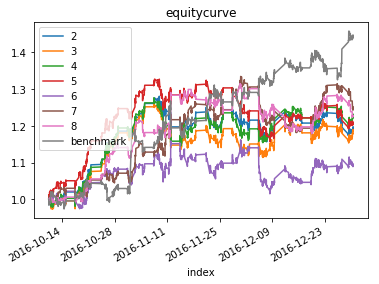

In [16]:
from Backtesting.Vectorized.models import OneContractTest

start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test1 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm, px_th=0.0)
test1.build( max_order, offset, start, end, tcas)

test1.run()

test1.plot()
test1.results[0]['benchmark'].plot()
plt.legend()
test1.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.262314,0.006478,-0.003198,0.002000,0.000154,-0.040180,0.026412,-0.065766,0.625451,6.173434,5157,1.796735,0.368043
1,0.278342,0.007818,-0.003411,0.001976,0.000255,-0.037608,0.026412,-0.074338,0.579308,7.021549,3775,1.961560,0.567417
2,0.292601,0.008593,-0.003453,0.001972,0.000308,-0.037608,0.026412,-0.062616,0.570934,7.341796,3427,2.056921,0.646046
3,0.302743,0.007133,-0.003631,0.002019,0.000238,-0.037608,0.026412,-0.085396,0.555990,5.890529,3691,1.877391,0.540233
4,0.308530,0.003714,-0.003086,0.002207,0.000110,-0.047068,0.026412,-0.096322,0.715313,3.009253,4163,1.456795,0.410041
5,0.297372,0.003807,-0.002773,0.002366,0.000103,-0.026522,0.026763,-0.098585,0.853319,3.200199,4543,1.468212,0.345366
6,0.298681,0.004130,-0.002556,0.002371,0.000103,-0.024286,0.046855,-0.085415,0.927732,3.456625,4908,1.507955,0.302363


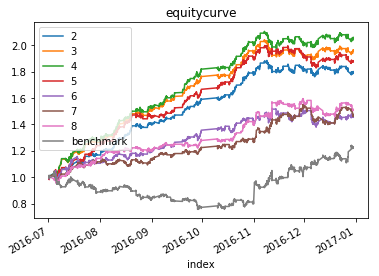

In [17]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test2 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test2.build( max_order, offset, start, end, tcas)

test2.run()

test2.plot()
test2.results[0]['benchmark'].plot()
plt.legend()
test2.performance

### 0.05% Threshold

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.303799,0.003282,-0.003680,0.002200,0.000080,-0.040180,0.026412,-0.096736,0.597665,2.701154,2430,1.193664,0.383951
1,0.299094,0.003155,-0.003986,0.002154,0.000104,-0.037608,0.026412,-0.119880,0.540345,2.636944,1789,1.186132,0.570710
2,0.308003,0.003882,-0.004025,0.002165,0.000139,-0.037608,0.026412,-0.103228,0.537917,3.150814,1643,1.229029,0.632380
3,0.320843,0.003522,-0.004218,0.002222,0.000120,-0.037608,0.026412,-0.128472,0.526818,2.744516,1728,1.207812,0.545139
4,0.354156,0.001580,-0.003497,0.002453,0.000047,-0.047068,0.026412,-0.126464,0.701540,1.115659,1967,1.093248,0.417895
5,0.362576,0.004264,-0.003160,0.002668,0.000115,-0.023376,0.026763,-0.114588,0.844399,2.939895,2183,1.251561,0.363262
6,0.389748,0.003866,-0.002846,0.002708,0.000097,-0.024286,0.046855,-0.103596,0.951651,2.479652,2359,1.228080,0.305638


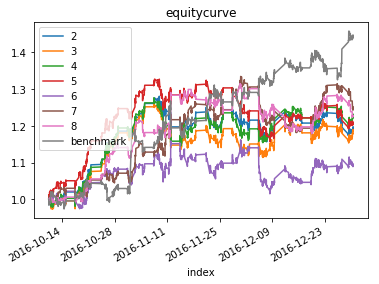

In [18]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test7 = MajorSeriesTest(df_bu_test_th, OUTPUT_DIR,slm_th_0, px_th=0.05/100)
test7.build( max_order, offset, start, end, tcas)

test7.run()

test7.plot()
test7.results[0]['benchmark'].plot()
plt.legend()
test7.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.229340,0.006052,-0.002855,0.002011,0.000153,-0.035462,0.026412,-0.054950,0.704472,6.597603,4856,1.744443,0.323517
1,0.261060,0.007222,-0.003173,0.002123,0.000250,-0.038500,0.026412,-0.065585,0.669123,6.915920,3559,1.888290,0.485811
2,0.289515,0.006840,-0.003585,0.002175,0.000278,-0.038500,0.026412,-0.076362,0.606766,5.906159,3031,1.841280,0.578357
3,0.294497,0.007019,-0.003517,0.002185,0.000246,-0.040094,0.039289,-0.064024,0.621069,5.958558,3506,1.863349,0.493440
4,0.267593,0.005681,-0.002886,0.002304,0.000167,-0.036944,0.039289,-0.077486,0.798431,5.307463,4195,1.698758,0.377116
5,0.242001,0.003122,-0.002664,0.002396,0.000086,-0.036203,0.054747,-0.090835,0.899474,3.225419,4469,1.384033,0.315731
6,0.271408,0.003137,-0.002525,0.002442,0.000081,-0.036203,0.039788,-0.105919,0.966982,2.889246,4772,1.385809,0.274308


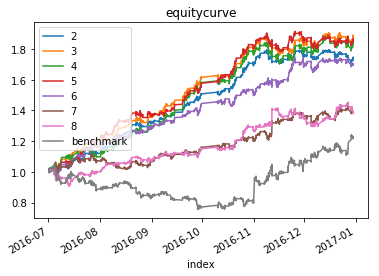

In [23]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test8 = MajorSeriesTest(df_bu_test_th, OUTPUT_DIR,slm_th_0, px_th=0.1/100)
test8.build( max_order, offset, start, end, tcas)

test8.run()

test8.plot()
test8.results[0]['benchmark'].plot()
plt.legend()
test8.performance

## 0.1% threshold in price movements

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.273324,0.003778,-0.003265,0.002203,0.000095,-0.035462,0.026412,-0.072329,0.674759,3.455355,2346,1.222886,0.329923
1,0.309613,0.004384,-0.003755,0.002408,0.000151,-0.038500,0.026412,-0.098543,0.641321,3.540157,1713,1.258674,0.478692
2,0.319637,0.002670,-0.003809,0.002333,0.000084,-0.037683,0.026412,-0.112297,0.612420,2.088116,1873,1.157515,0.393486
3,0.322835,0.003696,-0.003821,0.002446,0.000108,-0.041914,0.039289,-0.097763,0.640091,2.861864,2012,1.218043,0.360338
4,0.326959,0.004508,-0.003418,0.002527,0.000128,-0.036944,0.039289,-0.088722,0.739363,3.446686,2082,1.265955,0.335735
5,0.259286,0.000940,-0.003129,0.002501,0.000025,-0.036203,0.019696,-0.133146,0.799267,0.906337,2205,1.055460,0.294331
6,0.273674,0.001339,-0.002866,0.002647,0.000035,-0.036203,0.039289,-0.085836,0.923767,1.223132,2282,1.078999,0.261174


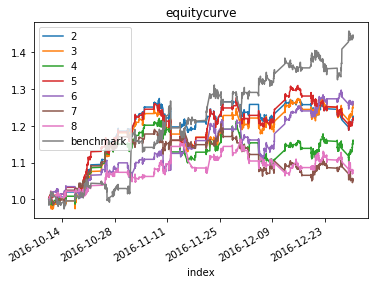

In [19]:
from Backtesting.Vectorized.models import OneContractTest

start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test3 = MajorSeriesTest(df_bu_test_th, OUTPUT_DIR,slm_th, px_th=0.1/100)
test3.build( max_order, offset, start, end, tcas)

test3.run()

test3.plot()
test3.results[0]['benchmark'].plot()
plt.legend()
test3.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.229340,0.006052,-0.002855,0.002011,0.000153,-0.035462,0.026412,-0.054950,0.704472,6.597603,4856,1.744443,0.323517
1,0.261060,0.007222,-0.003173,0.002123,0.000250,-0.038500,0.026412,-0.065585,0.669123,6.915920,3559,1.888290,0.485811
2,0.267734,0.005895,-0.003311,0.002092,0.000187,-0.037683,0.026412,-0.076648,0.631868,5.504465,3871,1.725076,0.403513
3,0.267230,0.005905,-0.003320,0.002157,0.000174,-0.041914,0.039289,-0.069665,0.649712,5.524061,4173,1.726287,0.366163
4,0.265193,0.005904,-0.002976,0.002265,0.000169,-0.036944,0.039289,-0.064366,0.761085,5.565598,4305,1.726172,0.335424
5,0.233617,0.002080,-0.002691,0.002293,0.000057,-0.036203,0.021429,-0.114168,0.852331,2.226290,4490,1.255889,0.286414
6,0.223235,0.001706,-0.002599,0.002366,0.000045,-0.036203,0.039289,-0.077161,0.910592,1.910164,4651,1.209796,0.260374


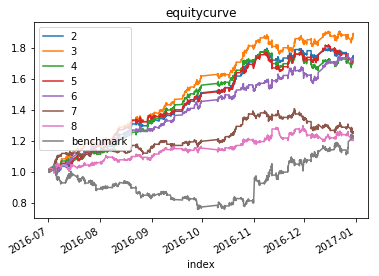

In [20]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test4 = MajorSeriesTest(df_bu_test_th, OUTPUT_DIR,slm_th, px_th=0.1/100)
test4.build( max_order, offset, start, end, tcas)

test4.run()

test4.plot()
test4.results[0]['benchmark'].plot()
plt.legend()
test4.performance

## 0.2% threshold in price movements

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
3,0.062426,0.000218,-0.004163,0.002660,0.000104,-0.014926,0.008455,-0.026636,0.638927,0.871539,123,1.012840,0.268293
4,0.093373,0.000166,-0.003273,0.002717,0.000041,-0.020092,0.009470,-0.042349,0.830073,0.444720,238,1.009800,0.222689
5,0.098128,-0.001306,-0.004018,0.002523,-0.000237,-0.026847,0.009390,-0.083170,0.628053,-3.326788,325,0.922958,0.200000
6,0.108330,-0.000900,-0.003107,0.002948,-0.000129,-0.016765,0.014599,-0.071613,0.948946,-2.076117,413,0.946922,0.193705


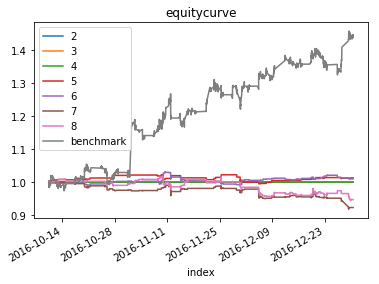

In [21]:
from Backtesting.Vectorized.models import OneContractTest

start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test5 = MajorSeriesTest(df_bu_test_th_2, OUTPUT_DIR,slm_th_2, px_th=0.2/100)
test5.build( max_order, offset, start, end, tcas)

test5.run()

test5.plot()
test5.results[0]['benchmark'].plot()
plt.legend()
test5.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1,1.000000,0.000000
3,0.051500,0.000395,-0.003460,0.002797,0.000254,-0.014926,0.011488,-0.025736,0.808479,1.917422,191,1.048584,0.272251
4,0.076235,0.000555,-0.002978,0.002730,0.000173,-0.020092,0.016839,-0.040076,0.916955,1.821517,395,1.068321,0.245570
5,0.083695,-0.000234,-0.003133,0.002743,-0.000052,-0.026847,0.020129,-0.091113,0.875464,-0.699829,557,0.971183,0.204668
6,0.092605,0.000111,-0.002745,0.002837,0.000020,-0.016765,0.020129,-0.067202,1.033608,0.299669,696,1.013653,0.212644


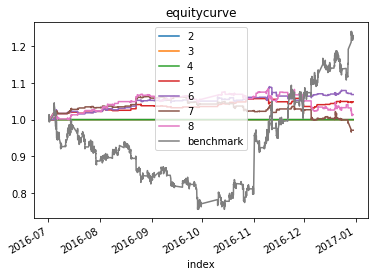

In [22]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test6 = MajorSeriesTest(df_bu_test_th_2, OUTPUT_DIR,slm_th_2, px_th=0.2/100)
test6.build( max_order, offset, start, end, tcas)

test6.run()

test6.plot()
test6.results[0]['benchmark'].plot()
plt.legend()
test6.performance